# Radio Telemetry Pipeline

## UCSD Engineers for Exploration, Summer 2017 REU
### Required Dependencies

In [2]:
import python_scripts.rct
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.signal as sg
import peakutils as pu

ModuleNotFoundError: No module named 'python_scripts'

### Initialize Run Variables

In [ ]:
run         = '19';
series      = 'desert'
path        = 'C:\\Users\\anthony\\Desktop\\e4e\\rct_runs\\'+series+'\\'

F_SDR       = 2000000.0     # sampling frequency of input data
F_REAL      = 17295083.0    # REAL COLLAR   
F_FAKE      = 172600000.0   # FAKE COLLAR
Fc          = 172500000.0   # Center frequency
FFT_LENGTH  = 4096

pW          = 0.02          # pulse width [seconds]
pT          = 1.6           # pulse period [seconds]

Fsx         = F_SDR          
Fx          = F_REAL         # target collar frequency
Fsf         = Fsx/FFT_LENGTH # sampling frquency of fft

xbin        = int( np.round( (Fx - Fc) / Fsx * FFT_LENGTH ) ) - 1
refbin      = int( np.round( (F_FAKE - Fc) / Fsx * FFT_LENGTH ) )
raw_files   = rct.getfiles(path,run)

## Windowing and Its Effect on the FFT Resampled Data
    Here multiple windows are applied to the data as the power spectrum is generated. The time domain data is <br> reconstructed from the target frequency bin. Welche's method is used, see the [scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html) for an explanation.

In [ ]:
windows = ['boxcar', 'triang', 'blackman', 'hamming', 'hann', 'bartlett', 'flattop']

# Look at one period of the time domain data
x = rct.raw2complex(raw_files[0])
x_slice = x[:int(pT*Fsx)]

f_Pxx = []

# Calculate the Power Spectrum for each window
for w in windows:
    f_Pxx.append(sg.welch(x,Fsx,window=w,nperseg=FFT_LENGTH,return_onesided=False))

### Plot the windows overlayed on the target frequency bin

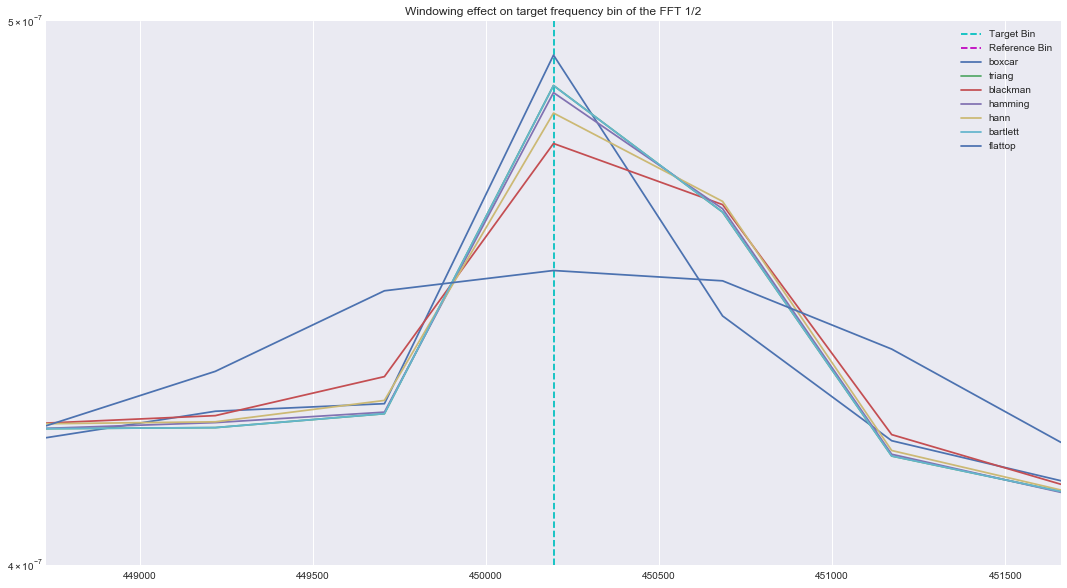

In [22]:
plt.figure(1, figsize=(40,10))

ax1 = plt.subplot(1,2,1)
plt.title('Windowing effect on target frequency bin of the FFT 1/2')
plt.axvline(f_Pxx[0][0][xbin], c='c', linestyle='--')
plt.axvline(f_Pxx[0][0][refbin], c='m', linestyle='--')

for f,Pxx in f_Pxx:
    plt.semilogy(f,Pxx)

plt.legend(np.concatenate((['Target Bin','Reference Bin'],windows)))
plt.xlim(f_Pxx[0][0][xbin-3],f_Pxx[0][0][xbin+3])
plt.ylim(4e-7,5e-7)

plt.show()